In [1]:
import pandas as pd

train = pd.read_csv('garbage/house_price/train.csv')
test  = pd.read_csv('garbage/house_price/test.csv')
sp=train['SalePrice']
df = pd.concat([train, test]).reset_index(drop=True)
totalMissing = df.isnull().sum().sort_values(ascending=False)
persentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([totalMissing, persentage], axis = 1)
missing.columns = ['total', 'persantage']
print(missing)

nTrain = train.shape[0]

              total  persantage
PoolQC         2909    0.996574
MiscFeature    2814    0.964029
Alley          2721    0.932169
Fence          2348    0.804385
SalePrice      1459    0.499829
...             ...         ...
Id                0    0.000000
HouseStyle        0    0.000000
HeatingQC         0    0.000000
YearRemodAdd      0    0.000000
1stFlrSF          0    0.000000

[81 rows x 2 columns]


C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:

test = missing.reset_index().rename(columns={'index':'var_name'})
print(test.loc[test['total']>5])

        var_name  total  persantage
0         PoolQC   2909    0.996574
1    MiscFeature   2814    0.964029
2          Alley   2721    0.932169
3          Fence   2348    0.804385
4      SalePrice   1459    0.499829
5    FireplaceQu   1420    0.486468
6    LotFrontage    486    0.166495
7   GarageFinish    159    0.054471
8     GarageCond    159    0.054471
9     GarageQual    159    0.054471
10   GarageYrBlt    159    0.054471
11    GarageType    157    0.053786
12      BsmtCond     82    0.028092
13  BsmtExposure     82    0.028092
14      BsmtQual     81    0.027749
15  BsmtFinType2     80    0.027407
16  BsmtFinType1     79    0.027064
17    MasVnrType     24    0.008222
18    MasVnrArea     23    0.007879


In [5]:
print(df['GarageType'].notnull())

0        True
1        True
2        True
3        True
4        True
        ...  
2914    False
2915     True
2916     True
2917    False
2918     True
Name: GarageType, Length: 2919, dtype: bool


In [6]:
missing_garage_index = df[df['GarageType'].notnull() & df['GarageQual'].isnull()].index
df['GarageYrBlt'].iloc[missing_garage_index] = df['YearBuilt'].iloc[missing_garage_index]
df['GarageFinish'].iloc[missing_garage_index] = df[df['GarageType'] == 'Detchd']['GarageFinish'].mode(dropna = False)[0]
df['GarageCars'].iloc[missing_garage_index[1]] = df[df['GarageType'] == 'Detchd']['GarageCars'].mode(dropna = False)[0]
df['GarageArea'].iloc[missing_garage_index[1]] = df[df['GarageType'] == 'Detchd']['GarageArea'].median()
df['GarageQual'].iloc[missing_garage_index] = df[df['GarageType'] == 'Detchd']['GarageQual'].mode(dropna = False)[0]
df['GarageCond'].iloc[missing_garage_index] = df[df['GarageType'] == 'Detchd']['GarageCond'].mode(dropna = False)[0]
df['GarageYrBlt'][df['GarageYrBlt'].isnull()] = df['YearBuilt'][df['GarageYrBlt'].isnull()]

C:\Users\Assessioner\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
print(missing_garage_index)

Int64Index([2126, 2576], dtype='int64')


In [16]:
basementColumns = []

for name in df.columns:
    if name.lower().find('bsmt') != -1:
        basementColumns.append(name)
nbasementColumns = df[basementColumns].dtypes[df[basementColumns].dtypes != 'object'].index
cbasementColumns = df[basementColumns].dtypes[df[basementColumns].dtypes == 'object'].index

noBasementIndex = df[(df['BsmtCond'].isnull() & df['BsmtQual'].isnull()
    & df['BsmtExposure'].isnull() & df['BsmtFinType1'].isnull() & df['BsmtFinType2'].isnull())].index
print(noBasementIndex)


for no in noBasementIndex:
    for col in nbasementColumns:
        df.at[no, col] = 0

for no in noBasementIndex:
    for col in cbasementColumns:
        df.at[no, col] = 'None'

df['BsmtQual'][df['BsmtQual'].isnull()] = df['BsmtCond'][df['BsmtQual'].isnull()]

# BsmtCond, replace na value with value of BsmtQual
df['BsmtCond'][df['BsmtCond'].isnull()] = df['BsmtQual'][df['BsmtCond'].isnull()]
# BsmtExposure, replace with mode
df['BsmtExposure'][df['BsmtExposure'].isnull()] = df['BsmtExposure'].mode()[0]
# BsmtFinType2, replace with FinType1
df['BsmtFinType2'][df['BsmtFinType2'].isnull()] = df['BsmtFinType2'].mode()[0]


C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412, 1585, 1593, 1729, 1778, 1814, 1847, 1848,
            1856, 1857, 1858, 1860, 1915, 2050, 2066, 2068, 2120, 2122, 2188,
            2189, 2190, 2193, 2216, 2224, 2387, 2435, 2452, 2453, 2490, 2498,
            2547, 2552, 2564, 2578, 2599, 2702, 2763, 2766, 2803, 2804, 2824,
            2891, 2904],
           dtype='int64')


C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
x = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
print(x.isnull().sum())
print(df[df['LotFrontage'].isnull()]['LotFrontage'])

0
7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
        ..
2847   NaN
2850   NaN
2900   NaN
2901   NaN
2908   NaN
Name: LotFrontage, Length: 486, dtype: float64


In [17]:
dropDominate = ['PoolQC', 'MiscFeature', 'Alley', 'Utilities']

df = df.drop(dropDominate, axis = 1)


cols = ['Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType'] 

for col in cols:
    df[col].fillna('None', inplace=True)
    
cols = ['LotFrontage'] #replace numerical with LotFrontage median in neighbor
for col in cols:
    df[col] = df.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.median()))
    
missing_MasVnrType = df[df['MasVnrArea'].notnull() & df['MasVnrType'].isnull()].index
df['MasVnrType'].iloc[missing_MasVnrType[0]] = 'BrkFace'
df['MasVnrType'][df['MasVnrType'].isnull()] = df['MasVnrType'].mode()[0]
df['MasVnrArea'][df['MasVnrArea'].isnull()] = df['MasVnrArea'].median()


# the rest missing categorical variable
cols = ['MSZoning', 'Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'] #replace categorical with the mode

for col in cols:
    df[col].fillna(df[col].mode()[0], inplace = True)

C:\Users\Assessioner\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


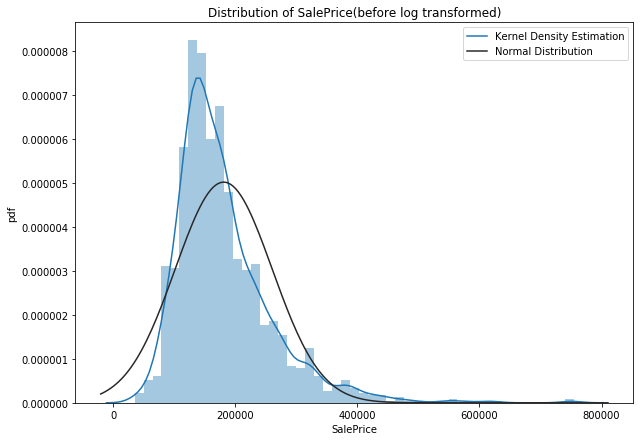

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

plt.figure(figsize = [10, 7])
salesPrice = df['SalePrice'][df['SalePrice'].notnull()]
sns.distplot(salesPrice, fit=norm, kde_kws={'label': 'Kernel Density Estimation'}, fit_kws={'label': 'Normal Distribution'});
plt.ylabel('pdf')
plt.title('Distribution of SalePrice(before log transformed)')
plt.legend()

In [19]:
import numpy as np

salesPrice = np.log(salesPrice)
print(salesPrice)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

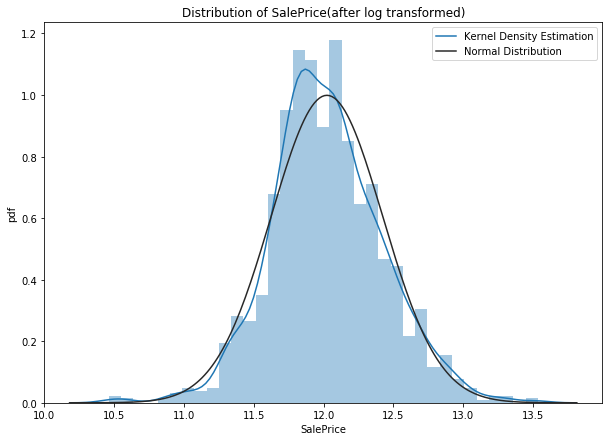

In [20]:
plt.figure(figsize = [10, 7])
sns.distplot(salesPrice, fit=norm, kde_kws={'label': 'Kernel Density Estimation'}, fit_kws={'label': 'Normal Distribution'});
plt.ylabel('pdf')
plt.title('Distribution of SalePrice(after log transformed)')
plt.legend()

In [21]:
cat_name = df.dtypes[df.dtypes=='object'].index.tolist()
print(cat_name)
df_cate = df[cat_name]

numlev = 10

catOver10 = []

for col in df_cate.columns:
    print(df[col].value_counts())
    if len(df[col].value_counts())>10:
        catOver10.append(col)
        
print(catOver10)

['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street']
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
TA      2608
Gd       123
Fa       104
None      79
Po         5
Name: BsmtCond, dtype: int64
No      1907
Av       418
Gd       276
Mn       239
None      79
Name: BsmtExposure, dtype: int64
Unf     851
GLQ     849
ALQ     429
Rec     288
BLQ     269
LwQ     154
None     79
Name: BsmtFinType1, dtype: int64
Unf     2494
Rec      105
LwQ       87
None      79
BL

In [22]:


percent_levels = 0.95
categoryOver95 = []
for column in df_cate.columns:
    if (df_cate[column].value_counts()/df_cate.shape[0]).sort_values(ascending = False)[0] > 0.95:
        categoryOver95.append(column)
print(column)

df  = df.drop(column, axis=1)

Street


In [23]:

print(len(df.columns))
print(sp.shape)
print(nTrain)

76
(1460,)
1460


In [24]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

df = pd.get_dummies(df)
train = df[:nTrain]
test = df[nTrain:]
sp = sp[:nTrain]

sp = np.log(sp)

def cv_rms(model = None):
    kf = KFold(n_splits=5)
    kf.get_n_splits(X = train, y = salesPrice[:nTrain])
    rmse_cv = np.sqrt(-cross_val_score(estimator=model, X = train, y = sp, scoring='neg_mean_squared_error', cv = kf))
    return rmse_cv


clf = LinearRegression()
rmse_cv = cv_rms(model = clf)
print('Linear Regression root mean squared error: {}'.format(rmse_cv.mean()))



Linear Regression root mean squared error: 37.156795877217874


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.